<a href="https://colab.research.google.com/github/haikaltech09/Analisis-Penjualan-1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")

In [40]:
from google.colab import drive


In [41]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_csv('/content/drive/My Drive/Dataset/Project1/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Menambahkan Kolom 'Bulan'

In [44]:
df['Date'] = pd.to_datetime(df.Date)
df['Bulan'] = pd.to_datetime(df['Date']).dt.month
df['Tahun'] = pd.to_datetime(df['Date']).dt.year
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Bulan,Tahun
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2019


# 1. Penjualan Terbanyak - Bulan

In [45]:
df['Bulan'].value_counts()

,count
Bulan,
1,352
3,345
2,303


In [46]:
hasil = df.groupby('Bulan').agg({'Total': 'sum'})
hasil

,Total
Bulan,
1,116291.868
2,97219.374
3,109455.507


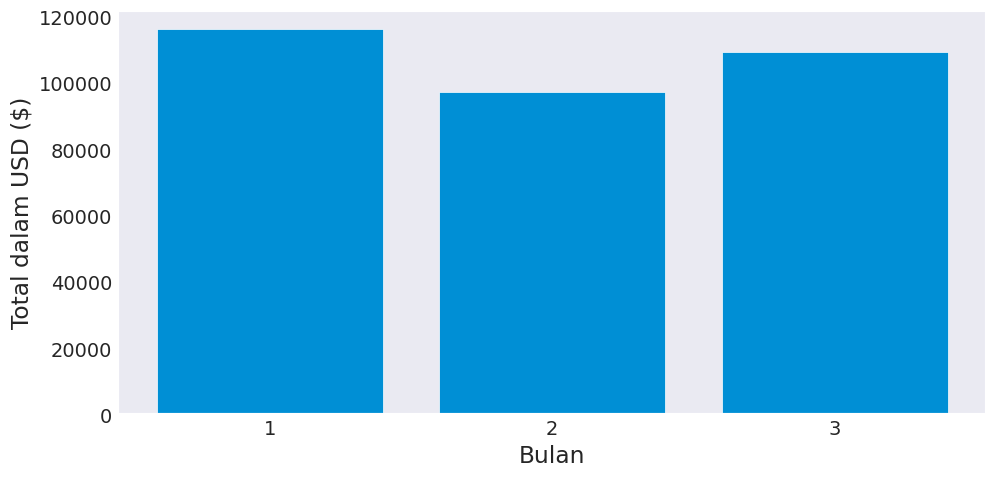

In [47]:
bulan = [Bulan for Bulan, df in df.groupby('Bulan')]
plt.figure(figsize=(10,5))
plt.bar(bulan, hasil['Total'])
plt.xticks(bulan)
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Bulan')
plt.grid()
plt.show()

**Berdasarkan hasil diatas dapat dilihat transaksi terbanyak ada pada bulan Januari dan terbanyak kedua ada pada bulan Maret. Pada bulan januari total pendapatannya mencapai 116291.868 USD**

# 2. Transaksi Terbanyak - Metode Pembayaran

In [48]:
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [49]:
hasil2 = df.groupby('Payment').agg({'Total': 'sum'})
hasil2

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


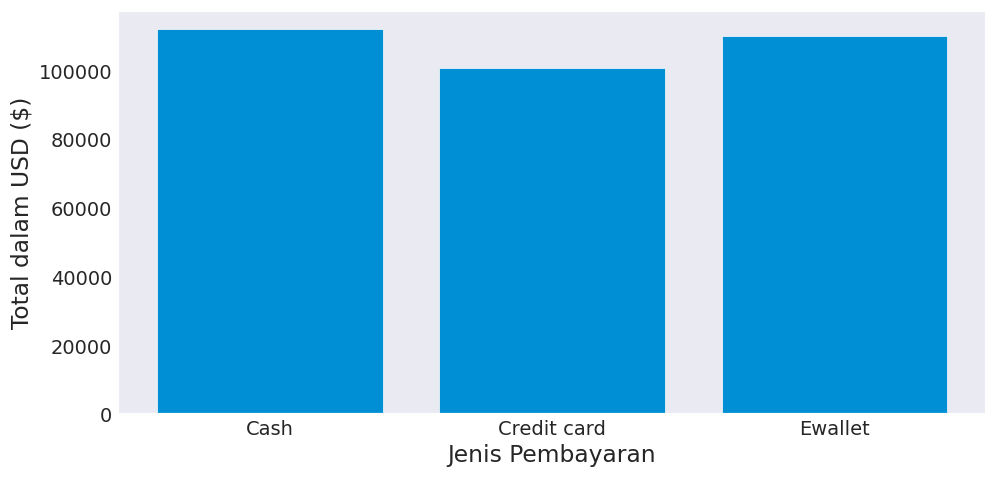

In [50]:
pembayaran = [Payment for Payment, df in df.groupby('Payment')]
plt.figure(figsize=(10,5))
plt.bar(pembayaran, hasil2['Total'])
plt.xticks(pembayaran)
plt.ylabel('Total dalam USD ($)')
plt.xlabel('Jenis Pembayaran')
plt.grid()
plt.show()

In [51]:
total = df.groupby(['Payment']).agg({'Total': 'sum', 'gross income':'sum'}).sort_values('Payment', ascending=True).head(5)
total = total[['Total','gross income']].round(2)
total

,Total,gross income
Payment,,
Cash,112206.57,5343.17
Credit card,100767.07,4798.43
Ewallet,109993.11,5237.77


[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

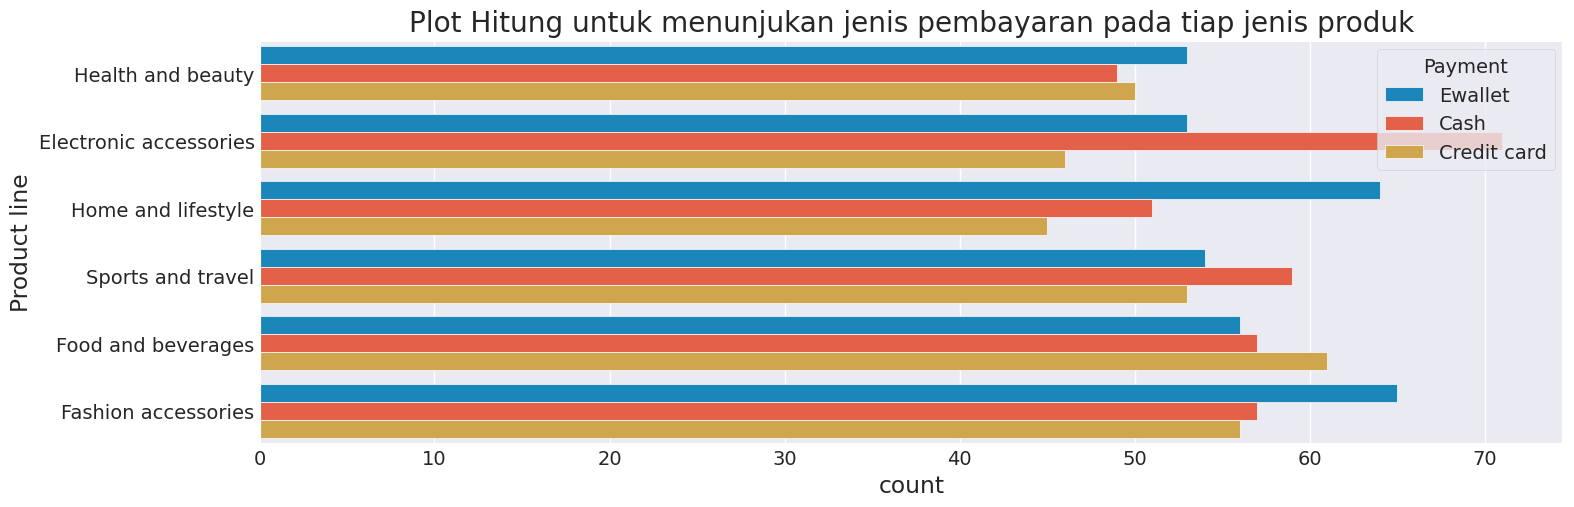

In [52]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='Payment').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

Text(0.5, 1.0, 'Menunjukan metode pembayaran terbanyak diberbagai cabang')

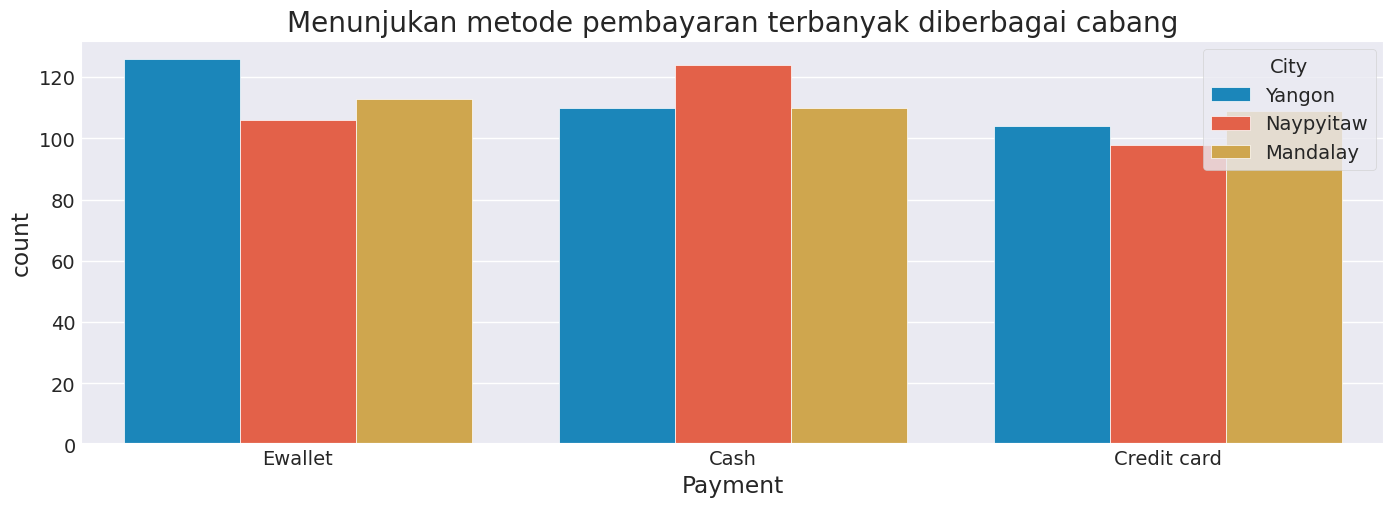

In [53]:
plt.figure(figsize= (15,5))
sns.countplot(x='Payment', data=df, hue='City')
plt.title('Menunjukan metode pembayaran terbanyak diberbagai cabang')

**Metode pembayaran antara Ewallet dan Cash hanya selisih 1 orang saja, akan tetapi transaksi terbanyak dilakukan dengan pembayaran secara Cash. Pembelian Elektronik Accessories menjadi pembelian dengan jenis pembayaran Cash terbanyak. Sedangkan pembelian E Wallet terbanyak ada pada produk Fashion Accessories Pembayaran dengan metode E wallet banyak dilakukan di Yangon Pembayaran dengan metode Cash banyak dilakukan di Naypitaw Pembayaran dengan metode Credit card banyak dilakukan di Mandalay**

# 3. Waktu Promosi

In [54]:
df['Time'] = pd.to_datetime(df['Time'])

In [55]:
df['Jam'] = df['Time'].dt.hour
df['Menit'] = df['Time'].dt.minute

In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Bulan,Tahun,Jam,Menit
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-09-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-09-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2024-09-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2024-09-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2024-09-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,2019,10,37


In [57]:
waktu =  df.groupby('Jam').agg({'Total': 'sum'})
waktu

,Total
Jam,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


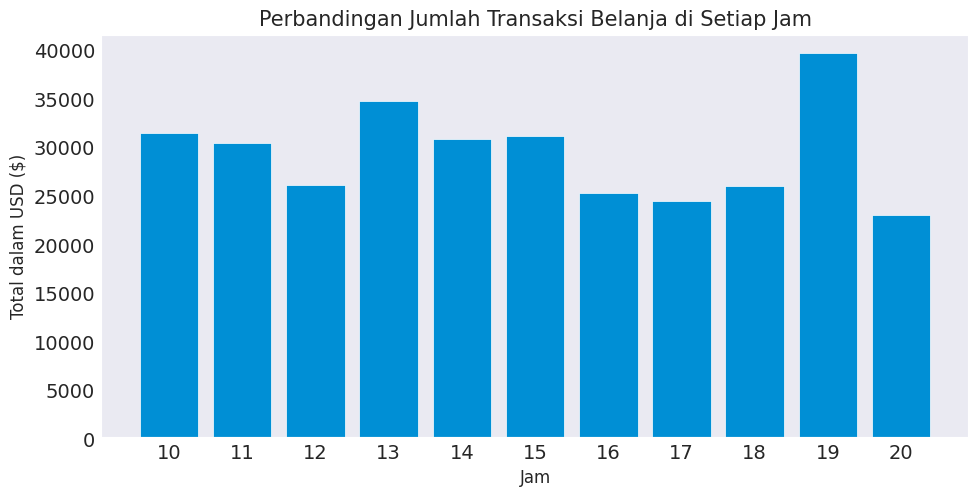

In [58]:
waktu = df.groupby('Jam').agg({'Total': 'sum'})
plt.figure(figsize=(10,5))
plt.bar(waktu.index, waktu['Total'])
plt.title('Perbandingan Jumlah Transaksi Belanja di Setiap Jam', fontsize=15)
plt.xticks(waktu.index)
plt.ylabel('Total dalam USD ($)', fontsize=12)
plt.xlabel('Jam', fontsize=12)
plt.grid()
plt.show()

In [59]:
promosi = df.groupby(['Jam']).agg({'Total': 'sum', 'gross income':'sum'}).sort_values('Total', ascending=True)
promosi = promosi[['Total','gross income']].round(2)
promosi

,Total,gross income
Jam,,
20,22969.53,1093.79
17,24445.22,1164.06
16,25226.32,1201.25
18,26030.34,1239.54
12,26065.88,1241.23
11,30377.33,1446.54
14,30828.40,1468.02
15,31179.51,1484.74
10,31421.48,1496.26


Text(0.5, 1.0, 'Menunjukan jam melakukan transaksi terbanyak di berbagai cabang')

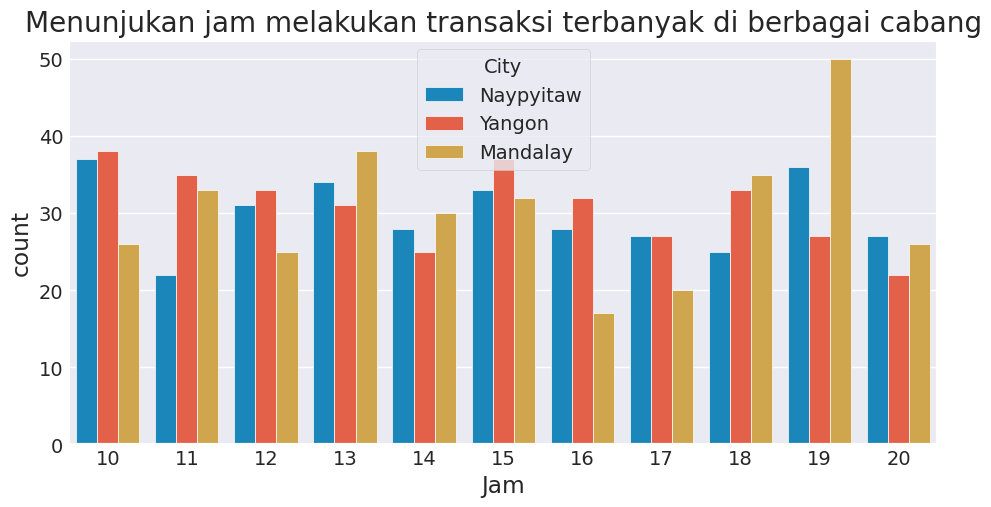

In [60]:
plt.figure(figsize= (10,5))
sns.countplot(x='Jam', data=df, hue='City')
plt.title('Menunjukan jam melakukan transaksi terbanyak di berbagai cabang')

**Secara keseluruhan dapat dilihat pada Jam 19.00 merupakan jam disaat transaksi terbanyak dilakukan. Berdasarkan tiap cabangnya dapat dibandingkan, di kota Mandalay jam 19.00 memang menjadi jam dengan pembeli terbanyak, di kota Yangon Jam 10.00 menjadi jam dengan pembeli terbanyak, dan di kota Naypitaw jam dengan pembeli terbanyak adalah jam 10.00**

# 4. Pembelian Terbanyak - Member atau Non Member

<Axes: ylabel='count'>

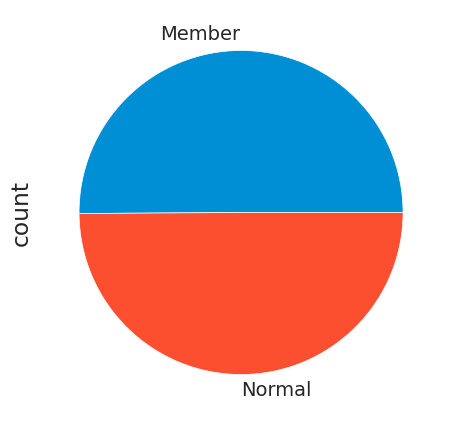

In [61]:
plt.figure(figsize=(10,5))
df['Customer type'].value_counts().plot.pie()

In [62]:
df['Customer type'].value_counts()

,count
Customer type,
Member,501
Normal,499


Text(0.5, 1.0, 'Menunjukan tipe pembeli di berbagai cabang')

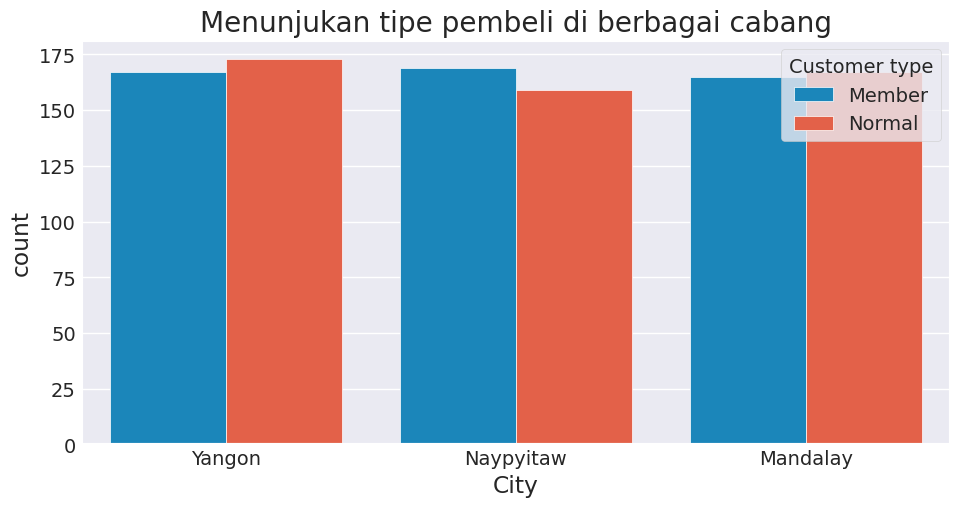

In [63]:
plt.figure(figsize= (10,5))
sns.countplot(x='City', data=df, hue='Customer type')
plt.title('Menunjukan tipe pembeli di berbagai cabang')

In [64]:
membership = df.groupby('Customer type').agg({'Total': 'sum'})
membership

,Total
Customer type,
Member,164223.444
Normal,158743.305


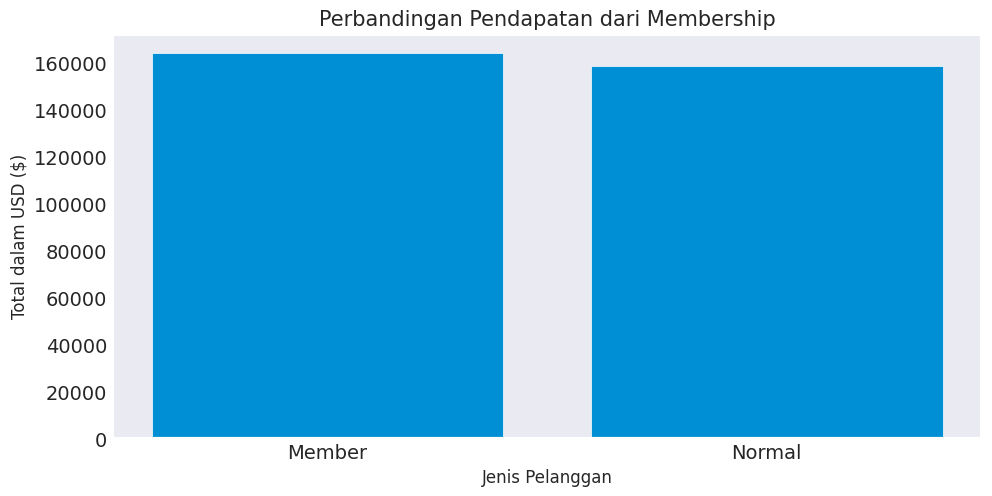

In [65]:
membership = df.groupby('Customer type').agg({'Total': 'sum'})
plt.figure(figsize=(10,5))
plt.bar(membership.index, membership['Total'])
plt.title('Perbandingan Pendapatan dari Membership', fontsize=15)
plt.xticks(membership.index)
plt.ylabel('Total dalam USD ($)', fontsize=12)
plt.xlabel('Jenis Pelanggan', fontsize=12)
plt.grid()
plt.show()

In [66]:
keanggotaan = df.groupby(['Customer type']).agg({'Total': 'sum', 'gross income':'sum'}).sort_values('Customer type', ascending=True)
keanggotaan = keanggotaan[['Total','gross income']].round(2)
keanggotaan

,Total,gross income
Customer type,,
Member,164223.44,7820.16
Normal,158743.30,7559.20


**Dapat terlihat, pelanggan member dengan pelanggan normal hanya memiliki selisiih sedikit, dengan hal tersebut jenis pelanggan dengan kategori member membelanjakan uangnya lebih banyak dibandingkan jenis pelanggan normal**

# 5. Produk Terbanyak dibeli

Text(0.5, 1.0, 'Diagram Garis untuk menunjukan Penjualan di Supermarket')

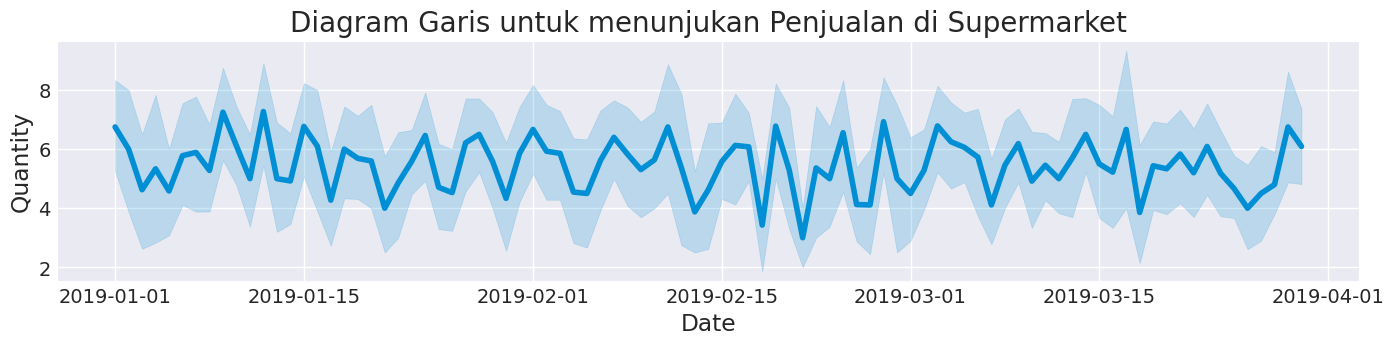

In [67]:
plt.figure(figsize=(15,3))
sns.lineplot(x='Date', y='Quantity', data=df).set_title('Diagram Garis untuk menunjukan Penjualan di Supermarket', fontdict = { 'fontsize': 20})


In [68]:
produk = df.groupby('Product line').agg({'Total': 'sum'})
produk

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


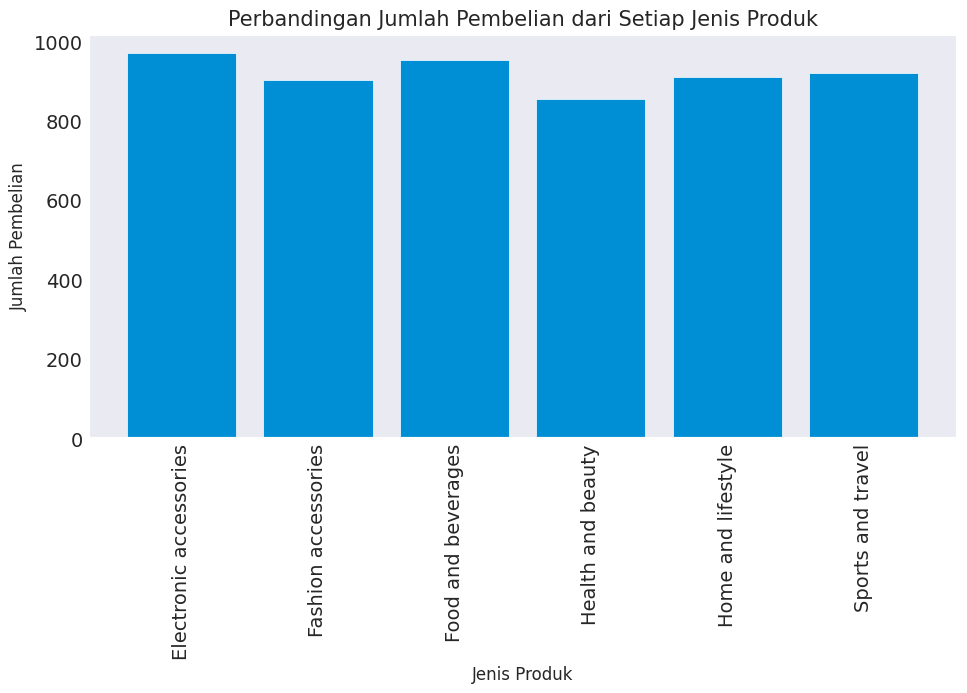

In [69]:
produk = [Product_line for Product_line, df in df.groupby('Product line')]
plt.figure(figsize=(10,5))
plt.bar(produk, df.groupby('Product line')['Quantity'].sum())
plt.xticks(produk,rotation = 'vertical')
plt.title('Perbandingan Jumlah Pembelian dari Setiap Jenis Produk', fontsize=15)
plt.ylabel('Jumlah Pembelian', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

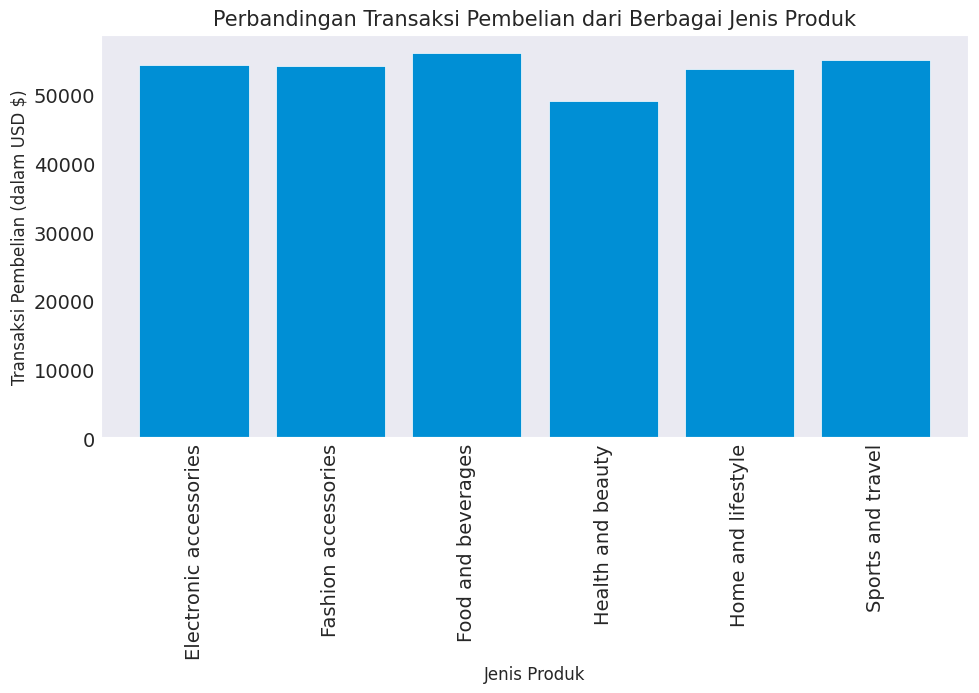

In [70]:
produk = df.groupby('Product line').agg({'Total': 'sum'})

plt.figure(figsize=(10,5))
plt.bar(produk.index, produk['Total'])
plt.xticks(produk.index,rotation = 'vertical')
plt.title('Perbandingan Transaksi Pembelian dari Berbagai Jenis Produk', fontsize=15)
plt.ylabel('Transaksi Pembelian (dalam USD $)', fontsize=12)
plt.xlabel('Jenis Produk', fontsize=12)
plt.grid()
plt.show()

In [71]:
jenis_transaksi=df.groupby(['Product line']).agg({'Quantity': 'sum', 'Total': 'sum', 'gross income':'sum'}).sort_values('Product line', ascending=True)
jenis_transaksi=jenis_transaksi[['Quantity','Total','gross income']].round(2)
jenis_transaksi

,Quantity,Total,gross income
Product line,,,
Electronic accessories,971,54337.53,2587.50
Fashion accessories,902,54305.90,2586.00
Food and beverages,952,56144.84,2673.56
Health and beauty,854,49193.74,2342.56
Home and lifestyle,911,53861.91,2564.85
Sports and travel,920,55122.83,2624.90


[Text(0.5, 1.0, 'Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')]

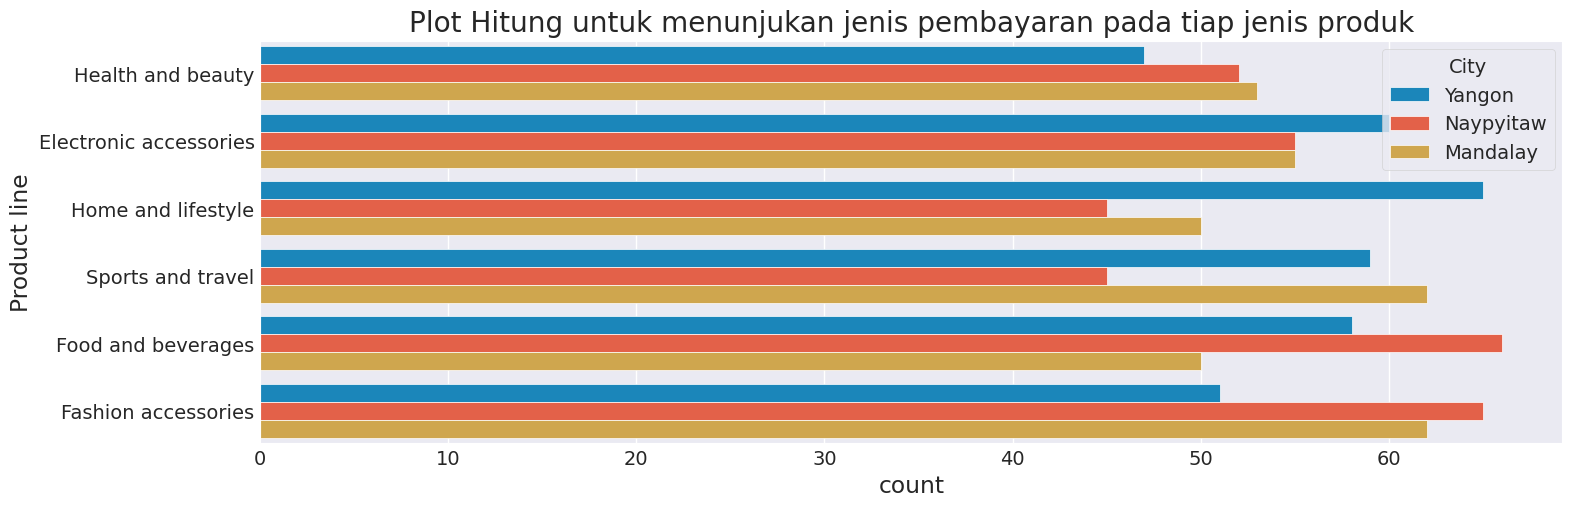

In [72]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='City').set(title='Plot Hitung untuk menunjukan jenis pembayaran pada tiap jenis produk')

**Di kota Naypitaw produk yang paling banyak dibeli adalah Food and Beverages dan Fashion Accessories, di kota Yangon yang terbanyak dibeli adalah Home and Lifestyle dan Electronic Accessories, sedangkan di kota Mandalay yang terbanyak adalah Fashion Accessories dan Sports and Travel**

# 6. Pendapatan Bersih Terbanyak - Kota

Text(0.5, 1.0, 'Perbandingan Jumlah Pembeli tiap Cabang')

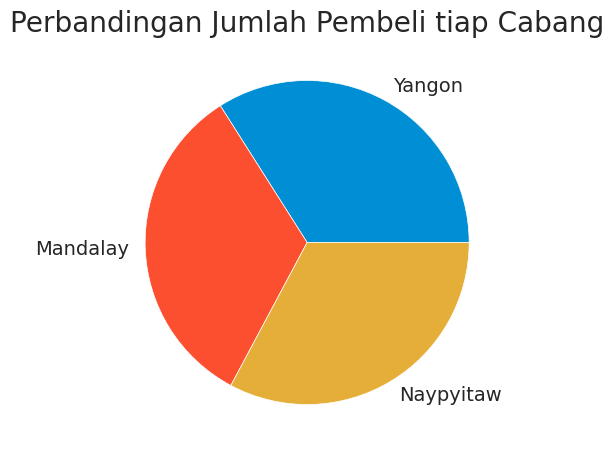

In [73]:
plt.figure(figsize=(15,5))
df['City'].value_counts().plot.pie()
plt.ylabel('')
plt.title('Perbandingan Jumlah Pembeli tiap Cabang')

In [74]:
kota=df.groupby(['City']).agg({'Quantity':'sum', 'Total': 'sum', 'gross income':'sum'}).sort_values('City', ascending=False)
kota=kota[['Quantity','Total','gross income']].round(2)
kota

,Quantity,Total,gross income
City,,,
Yangon,1859,106200.37,5057.16
Naypyitaw,1831,110568.71,5265.18
Mandalay,1820,106197.67,5057.03


In [75]:
kota=df.groupby('City').agg({'Total': 'sum'})
kota

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


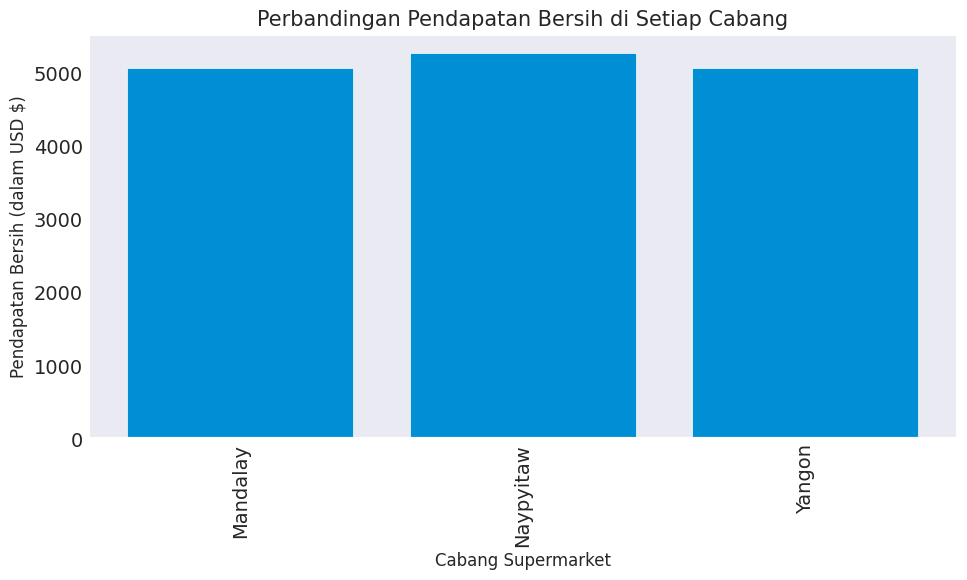

In [76]:
kota2 = [City for City, df in df.groupby('City')]
plt.figure(figsize=(10,5))
kota = df.groupby('City').agg({'gross income': 'sum'})
plt.bar(kota2, kota['gross income'])
plt.xticks(kota2,rotation = 'vertical')
plt.title('Perbandingan Pendapatan Bersih di Setiap Cabang', fontsize=15)
plt.ylabel('Pendapatan Bersih (dalam USD $)', fontsize=12)
plt.xlabel('Cabang Supermarket', fontsize=12)
plt.grid()
plt.show()


**Berdasarkan hasil diatas dapat dilihat, walaupun Yangon memiliki jumlah pembeli dan kuantitas pembelian terbanyak. Naypitaw menjadi cabang dengan jumlah transaksi pembelian terbanyak dengan total 110568.71 USD dan total pendapatan bersihnya hingga 5265.18 USD**

# 7. Kesimpulan

**Berdasarkan hal yang sudah dituliskan diatas, dapat ditarik beberapa kesimpulan seperti:**

*   Metode pembayaran antara Ewallet dan Cash hanya selisih 1 orang saja, akan tetapi transaksi terbanyak dilakukan dengan pembayaran secara Cash. Pembelian Elektronik Accessories menjadi pembelian dengan jenis pembayaran Cash terbanyak. Sedangkan pembelian E Wallet terbanyak ada pada produk Fashion Accessories. Pembayaran dengan metode E wallet banyak dilakukan di Yangon. Pembayaran dengan metode Cash banyak dilakukan di Naypitaw. Pembayaran dengan metode Credit card banyak dilakukan di Mandalay.
*   Tiap cabang memiliki waktu terbaik yang berbeda, di kota Mandalay jam 19.00 memang menjadi jam dengan pembeli terbanyak, di kota Yangon Jam 10.00 menjadi jam dengan pembeli terbanyak, dan di kota Naypitaw jam dengan pembeli terbanyak adalah jam 10.00
*   Jumlah Member dan Non member yang berbelanja dari kisaran bulan januari sampai bulan maret cenderung sama, meskipun demikian member membelanjakan uangnya lebih banyak daripada Non member. Dengan promo-promo yang diberikan kepada member, maka supermarket haruslah menambah jumlah member agar transaksi yang diberikan juga lebih banyak.
*   Di kota Naypitaw produk yang paling banyak dibeli adalah Food and Beverages dan Fashion Accessories, di kota Yangon yang terbanyak dibeli adalah Home and Lifestyle dan Electronic Accessories, sedangkan di kota Mandalay yang terbanyak adalah Fashion Accessories dan Sports and Travel
*   Dari cabang yang ada di 3 kota, kota Naypitaw memberikan pemasukan terbanyak pada supermarket, padahal jumlah pembeli yang ada di kota Naypitaw lebih sedikit dibandingkan di 2 cabang yang lain, hal ini berarti Masyarakat di kota Naypitaw lebih sering mengeluarkan banyak uang saat berbelanja.

**Dengan demikian untuk dapat memaksimalkan penjualan, Supermarket perlu untuk:**

*   Mengadakan Promo pada waktu tertentu agar dapat terus meningkatkan pendapatan setiap bulannya
*   Membuat aplikasi berbelanja secara online agar pemanfaatan E wallet lebih meningkat
*   Memasang iklan pada Supermarket tersebut, baik mengiklankan diri ataupun mengajak perusahaan lain untuk beriklan di Supermarket pada jam-jam terbaik
Meningkatkan jumlah member.
*   Memperbanyak Variasi Produk pada bagian Health and Beauty agar dapat meningkatkan juga transaksi pada jenis Health and Beauty. Selain itu dengan data tersebut kita juga dapat melihat kebiasaan masyarakat sekitar, seperti di kota Naypitaw masyarakatnya senang berbelanja makanan di luar dan senang berbelanja Fashion Accessories, di Kota Yangon yang banyak dibeli adalah kebutuhan rumah seperti Home and Lifestyle dan Electronic Accessories, dan di kota Mandalay yang terbanyak adalah Fashion Accessories dan Sports and Travel artinya dikota ini masyarakatnya senang untuk keluar dan berpergian.
Melakukan promosi berupa pembelian skala besar kepada pelanggan sehingga dapat menarik pelanggan untuk membeli secara besar-besaran. **bold text**